In [1]:
import numpy as np 
import tensorflow as tf
import os 
import sys 

import shap
def compute_data_metrics(classifier, input_data, input_adj, y_true):
    # Assuming the TensorFlow  is stored in the variable `model`
    y_train_pred = classifier.model.predict([input_data, input_adj])
    y_train_pred_argmax = np.argmax(y_train_pred, axis=1)
    y_train_true = np.argmax(y_true, axis=1)
    from utils.utils_mine import get_metrics
    return get_metrics(y_train_pred_argmax, y_train_true)

main_pth = '/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/'
sys.path.append(main_pth)
os.chdir(main_pth)
from LOO_nested_CV_model import build_model


def print_test_val_metrics(np_test_metrics, np_val_metrics):
    mean_test_metrics = np.mean(np_test_metrics, axis=0)
    std_test_metrics = np.std(np_test_metrics, axis=0)

    mean_val_metrics = np.mean(np_val_metrics, axis=0)
    std_val_metrics = np.std(np_val_metrics, axis=0)

    from utils.fnirs_utils import print_md_table_val_test_AUC
    print_md_table_val_test_AUC('Mean', mean_test_metrics, mean_val_metrics, already_balanced_accuracy=True)
    print_md_table_val_test_AUC('STD', std_test_metrics, std_val_metrics, already_balanced_accuracy=True, print_table_header=False)
    

model_name =  'gnn_transformer_with_cli_demo_v1' # 'gnn_transformer_with_cli_demo'#'gnn_transformer_with_cli_demo' # 'gnn_transformer'
config_file_name = 'pretreatment_response_cv_5_mix_hb'
msg = 'loocv_v4to13'
TrainModel = build_model(model_name, config_file_name, msg)


2024-05-28 20:08:18.698414: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-28 20:08:18.716286: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:7704] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-28 20:08:18.716310: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-28 20:08:18.716315: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1520] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-28 20:08:18.719834: I tensorflow/core/platform/cpu_feature_g

fold_path is not founded yet results/gnn_transformer_with_cli_demo_v1/prognosis_mix_hb/pretreatment_response/loocv_v4to13l1_rate_0.01_l2_rate_0.001_d_model_16_batch_size_64_n_layers_6_num_class_2_classweight1_5/LOO_nested_CV/LOO_0/stratified_nested_5_CV_fold-0
results/gnn_transformer_with_cli_demo_v1/prognosis_mix_hb/pretreatment_response/loocv_v4to13l1_rate_0.01_l2_rate_0.001_d_model_16_batch_size_64_n_layers_6_num_class_2_classweight1_5/LOO_nested_CV/LOO_0/stratified_nested_5_CV_fold-0/val_acc.txt will be set to 0 because it has not been trained yet
fold_path is not founded yet results/gnn_transformer_with_cli_demo_v1/prognosis_mix_hb/pretreatment_response/loocv_v4to13l1_rate_0.01_l2_rate_0.001_d_model_16_batch_size_64_n_layers_6_num_class_2_classweight1_5/LOO_nested_CV/LOO_0/stratified_nested_5_CV_fold-1
results/gnn_transformer_with_cli_demo_v1/prognosis_mix_hb/pretreatment_response/loocv_v4to13l1_rate_0.01_l2_rate_0.001_d_model_16_batch_size_64_n_layers_6_num_class_2_classweight1_5

2024-05-28 20:08:19.742264: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-28 20:08:19.742310: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-28 20:08:20.002174: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

X_train: (51, 52, 2500)
X_val: (12, 52, 2500)
X_test: (1, 52, 2500)
total sample size is 64
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 52, 2500, 1)]        0         []                            
                                                                                                  
 tf.__operators__.getitem (  (None, 52, 2500)             0         ['input_3[0][0]']             
 SlicingOpLambda)                                                                                 
                                                                                                  
 input_1 (InputLayer)        [(None, 52, 52)]             0         []                            
                                                                                                  
 t

In [2]:
import numpy as np
data = np.load('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/allData/prognosis_mix_hb/pretreatment_response/nor_demo_cli_merge_data.npy')
print(data.shape)
new_data = data[:, :17]
np.save('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/allData/prognosis_mix_hb/pretreatment_response/nor_demo_cli_merge_data_17.npy', new_data)

(64, 17)


In [2]:
from utils.utils_mine import stratified_LOO_nested_CV

data = TrainModel.data
label = TrainModel.label
adj = TrainModel.adj
if TrainModel.cli_demo.any():
    cli_demo = TrainModel.cli_demo
else:
    cli_demo = None
    
current_loo = 0
k = 0
num_of_k_fold = 5
classifier = TrainModel.model
X_train, Y_train, X_val, Y_val, X_test, Y_test, adj_train, adj_val, adj_test = stratified_LOO_nested_CV(data, label, k=k, num_of_k_fold=num_of_k_fold, current_loo=current_loo, adj=adj)

# print(f'X_train: {X_train.shape}')
# print(f'X_val: {X_val.shape}')
# print(f'X_test: {X_test.shape}')

label: [[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]]
np.unique(label) [0 1]
label_not_onehot: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0]


In [4]:
cli_demo.shape

(64, 17)

In [ ]:
from utils.fnirs_utils import get_metrics_auc

all_subjects_shap = []
val_metrics = []
test_metrics = []
y_pred_test_all = []
y_pred_val_all = []
# for v_i in range(4, 4+10):
for v_i in range(10): # loocv_v0l1_rate_0.01_l2_rate_0.001_d_model_16_batch_size_64_n_layers_6_classweight1_5_epochs_1000
    model_para = f'loocv_v{v_i}l1_rate_0.01_l2_rate_0.001_d_model_16_batch_size_64_n_layers_6_classweight1_5_epochs_1000'
    y_pred_test_fold = []
    for subject in range(64):
        for k_fold in range(num_of_k_fold):
            X_train, Y_train, X_val, Y_val, X_test, Y_test, adj_train, adj_val, adj_test = stratified_LOO_nested_CV(data, label, k=k_fold, num_of_k_fold=num_of_k_fold, current_loo=subject, adj=adj)
            checkpoint_path = f'results/gnn_transformer/prognosis_mix_hb/pretreatment_response/{model_para}/LOO_nested_CV/LOO_{subject}/stratified_nested_5_CV_fold-{k_fold}/checkpoint' # fold-best-checkpoint

            classifier.model.load_weights(checkpoint_path)
            model = classifier.model
            y_pred_val = model.predict([X_val, adj_val])
            y_pred_test = model.predict([X_test, adj_test])
            y_pred_test_fold.append(y_pred_test)
            val_metrics.append(get_metrics_auc(Y_val.argmax(axis=1), y_pred_val))
    y_pred_test_fold = np.array(y_pred_test_fold)
    y_pred_test_fold = np.squeeze(y_pred_test_fold)
    y_pred_test_fold = y_pred_test_fold.reshape(64, 5, 2)
    y_pred_test_fold = np.mean(y_pred_test_fold, axis=1)
    y_pred_test_all.append(y_pred_test_fold)
    test_metrics.append(get_metrics_auc(y_pred_test_fold.argmax(axis=1), label))
            # NOTE TO DO: why the train metrics are very bad? see sub-0 fold-0/1 
            # train_metrics = compute_data_metrics(classifier, X_train, adj_train, Y_train)
            # val_metrics = compute_data_metrics(classifier, X_val, adj_val, Y_val)
            # print(f"sub - {subject} - fold - {k_fold} - train metrics - {train_metrics}")
            # print(f"sub - {subject} - fold - {k_fold} - val metrics - {val_metrics}")
            
            # explainer = shap.GradientExplainer(classifier.model, [X_train, adj_train])
            # shap_values, _ = explainer.shap_values([X_test, adj_test])
            # all_subjects_shap.append(shap_values)


In [4]:

from utils.fnirs_utils import get_metrics_auc

all_subjects_shap = []
val_metrics = []
test_metrics = []
y_pred_test_all = []
y_pred_val_all = []
# for v_i in range(6):
for v_i in range(10,20):
    
    model_para = f'loocv_v{v_i}l1_rate_0.01_l2_rate_0.001_d_model_16_batch_size_64_n_layers_6'
    y_pred_test_fold = []
    for subject in range(64):
        for k_fold in range(num_of_k_fold):
            X_train, Y_train, X_val, Y_val, X_test, Y_test, adj_train, adj_val, adj_test, cli_demo_train, cli_demo_val, cli_demo_test = stratified_LOO_nested_CV(data, label, k=k_fold, num_of_k_fold=num_of_k_fold, current_loo=subject, adj=adj, cli_demo=cli_demo)
            checkpoint_path = f'results/gnn_transformer_with_cli_demo_v1/prognosis_mix_hb/pretreatment_response/{model_para}/LOO_nested_CV/LOO_{subject}/stratified_nested_5_CV_fold-{k_fold}/checkpoint' # fold-best-checkpoint

            classifier.model.load_weights(checkpoint_path)
            model = classifier.model
            y_pred_val = model.predict([X_val, adj_val, cli_demo_val])
            y_pred_test = model.predict([X_test, adj_test, cli_demo_test])
            y_pred_test_fold.append(y_pred_test)
            val_metrics.append(get_metrics_auc(Y_val.argmax(axis=1), y_pred_val))
    y_pred_test_fold = np.array(y_pred_test_fold)
    y_pred_test_fold = np.squeeze(y_pred_test_fold)
    y_pred_test_fold = y_pred_test_fold.reshape(64, 5, 2)
    y_pred_test_fold = np.mean(y_pred_test_fold, axis=1)
    y_pred_test_all.append(y_pred_test_fold)
    test_metrics.append(get_metrics_auc(y_pred_test_fold.argmax(axis=1), label))
            # NOTE TO DO: why the train metrics are very bad? see sub-0 fold-0/1 
            # train_metrics = compute_data_metrics(classifier, X_train, adj_train, Y_train)
            # val_metrics = compute_data_metrics(classifier, X_val, adj_val, Y_val)
            # print(f"sub - {subject} - fold - {k_fold} - train metrics - {train_metrics}")
            # print(f"sub - {subject} - fold - {k_fold} - val metrics - {val_metrics}")
            
            # explainer = shap.GradientExplainer(classifier.model, [X_train, adj_train])
            # shap_values, _ = explainer.shap_values([X_test, adj_test])
            # all_subjects_shap.append(shap_values)


label: [[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]]
np.unique(label) [0 1]
label_not_onehot: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0]
1/1 [==============================] - 0s 13ms/step
label: [[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0

2024-05-28 20:10:17.969371: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


label: [[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]]
np.unique(label) [0 1]
label_not_onehot: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0]
1/1 [==============================] - 0s 13ms/step
label: [[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0

In [ ]:
# GNN_TR_cli_v2 
from utils.fnirs_utils import get_metrics_auc

all_subjects_shap = []
val_metrics = []
test_metrics = []
y_pred_test_all = []
y_pred_val_all = []
for v_i in range(6):
    model_para = f'loocv_v{v_i}l1_rate_0.01_l2_rate_0.001_d_model_16_batch_size_64_n_layers_6_num_class_2'
    y_pred_test_fold = []
    for subject in range(64):
        for k_fold in range(num_of_k_fold):
            X_train, Y_train, X_val, Y_val, X_test, Y_test, adj_train, adj_val, adj_test, cli_demo_train, cli_demo_val, cli_demo_test = stratified_LOO_nested_CV(data, label, k=k_fold, num_of_k_fold=num_of_k_fold, current_loo=subject, adj=adj, cli_demo=cli_demo)
            checkpoint_path = f'results/gnn_transformer_with_cli_demo/prognosis_mix_hb/pretreatment_response/{model_para}/LOO_nested_CV/LOO_{subject}/stratified_nested_5_CV_fold-{k_fold}/fold-best-checkpoint'

            classifier.model.load_weights(checkpoint_path)
            model = classifier.model
            y_pred_val = model.predict([X_val, adj_val, cli_demo_val])
            y_pred_test = model.predict([X_test, adj_test, cli_demo_test])
            y_pred_test_fold.append(y_pred_test)
            val_metrics.append(get_metrics_auc(Y_val.argmax(axis=1), y_pred_val))
    y_pred_test_fold = np.array(y_pred_test_fold)
    y_pred_test_fold = np.squeeze(y_pred_test_fold)
    y_pred_test_fold = y_pred_test_fold.reshape(64, 5, 2)
    y_pred_test_fold = np.mean(y_pred_test_fold, axis=1)
    y_pred_test_all.append(y_pred_test_fold)
    test_metrics.append(get_metrics_auc(y_pred_test_fold.argmax(axis=1), label))
            # NOTE TO DO: why the train metrics are very bad? see sub-0 fold-0/1 
            # train_metrics = compute_data_metrics(classifier, X_train, adj_train, Y_train)
            # val_metrics = compute_data_metrics(classifier, X_val, adj_val, Y_val)
            # print(f"sub - {subject} - fold - {k_fold} - train metrics - {train_metrics}")
            # print(f"sub - {subject} - fold - {k_fold} - val metrics - {val_metrics}")
            
            # explainer = shap.GradientExplainer(classifier.model, [X_train, adj_train])
            # shap_values, _ = explainer.shap_values([X_test, adj_test])
            # all_subjects_shap.append(shap_values)


[[0.4921875  0.3125     0.79166667 0.55208333]
 [0.5109375  0.35       0.81818182 0.58409091]
 [0.52796053 0.36842105 0.82222222 0.59532164]
 [0.6328125  0.5        0.86956522 0.68478261]
 [0.50260417 0.33333333 0.80434783 0.56884058]
 [0.50260417 0.33333333 0.80434783 0.56884058]
 [0.4703125  0.3        0.79545455 0.54772727]
 [0.47940341 0.31818182 0.80952381 0.56385281]
 [0.50260417 0.33333333 0.80434783 0.56884058]
 [0.54600694 0.38888889 0.82608696 0.60748792]
 [0.57552083 0.41666667 0.80769231 0.61217949]
 [0.53422619 0.38095238 0.8372093  0.60908084]
 [0.5109375  0.35       0.81818182 0.58409091]]


In [6]:
np_test_metrics = np.array(test_metrics)
np_test_metrics[:, 0] = (np_test_metrics[:, 1] + np_test_metrics[:, 0]) / 2
print(np_test_metrics)
np_val_metrics = np.array(val_metrics)
np_val_metrics = np.reshape(np_val_metrics, (-1, 64, 5, 4))
np_val_metrics = np.mean(np_val_metrics, axis=(1,2))
np_val_metrics[:, 0] = (np_val_metrics[:, 1] + np_val_metrics[:, 2])/2
print(np_val_metrics.shape)
print(np_val_metrics)

print_test_val_metrics(np_test_metrics, np_val_metrics)


[[0.55168269 0.38461538 0.80392157 0.59426848]
 [0.5859375  0.4375     0.83333333 0.63541667]
 [0.6328125  0.5        0.85416667 0.67708333]
 [0.52022059 0.35294118 0.80851064 0.58072591]
 [0.48601974 0.31578947 0.8        0.55789474]
 [0.5390625  0.375      0.8125     0.59375   ]]
(6, 4)
[[0.79322917 0.684375   0.90208333 0.81747685]
 [0.78741319 0.6703125  0.90451389 0.8068287 ]
 [0.80399306 0.7        0.90798611 0.83078704]
 [0.79157986 0.68072917 0.90243056 0.8083912 ]
 [0.78949653 0.67552083 0.90347222 0.80665509]
 [0.79184028 0.68229167 0.90138889 0.81255787]]
| Model Name | Testing Set |             |             |             | Validation Set |             |             |             |
|------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
|            | Balanced Accuracy | Sensitivity | Specificity | AUC | Balanced Accuracy | Sensitivity | Specificity | AUC |
| Mean   | 55.2623  | 39.4308  | 81.8739  | 60.

In [4]:
np_test_metrics = np.array(test_metrics)
np_test_metrics[:, 0] = (np_test_metrics[:, 1] + np_test_metrics[:, 0]) / 2
print(np_test_metrics)
np_val_metrics = np.array(val_metrics)
np_val_metrics = np.reshape(np_val_metrics, (-1, 64, 5, 4))
np_val_metrics = np.mean(np_val_metrics, axis=(1,2))
np_val_metrics[:, 0] = (np_val_metrics[:, 1] + np_val_metrics[:, 2])/2
print(np_val_metrics.shape)
print(np_val_metrics)

print_test_val_metrics(np_test_metrics, np_val_metrics)


[[0.4921875  0.3125     0.79166667 0.55208333]
 [0.5109375  0.35       0.81818182 0.58409091]
 [0.52796053 0.36842105 0.82222222 0.59532164]
 [0.6328125  0.5        0.86956522 0.68478261]
 [0.50260417 0.33333333 0.80434783 0.56884058]
 [0.50260417 0.33333333 0.80434783 0.56884058]
 [0.4703125  0.3        0.79545455 0.54772727]
 [0.47940341 0.31818182 0.80952381 0.56385281]
 [0.50260417 0.33333333 0.80434783 0.56884058]
 [0.54600694 0.38888889 0.82608696 0.60748792]]
(10, 4)
[[0.75694444 0.61458333 0.89930556 0.70188079]
 [0.75651042 0.61302083 0.9        0.69803241]
 [0.74383681 0.5859375  0.90173611 0.67841435]
 [0.75477431 0.6109375  0.89861111 0.68790509]
 [0.74704861 0.60104167 0.89305556 0.6786169 ]
 [0.74470486 0.5921875  0.89722222 0.68738426]
 [0.74930556 0.59479167 0.90381944 0.69195602]
 [0.74704861 0.59479167 0.89930556 0.69554398]
 [0.74557292 0.58697917 0.90416667 0.68350694]
 [0.74401042 0.59114583 0.896875   0.68773148]]
| Model Name | Testing Set |             |        

In [7]:
save_fold = 'results/gnn_transformer/prognosis_mix_hb/pretreatment_response/ten-fold-evaluate'
np.save(save_fold + '/val_metrics.npy', np_val_metrics)
np.save(save_fold + '/test_metrics.npy', np_test_metrics)
# np.save(save_fold + '/y_pred_test_all.npy', np_y_pred_test_all)

In [3]:
save_fold = 'results/gnn_transformer/prognosis_mix_hb/pretreatment_response/ten-fold-evaluate'
reload_test_metrics = np.load(save_fold + '/test_metrics.npy')
reload_val_metrics = np.load(save_fold + '/val_metrics.npy')
reload_y_pred_test_all = np.load(save_fold + '/y_pred_test_all.npy')
print(reload_test_metrics)
print('-'*10)
print(reload_val_metrics)


[[0.69196429 0.57142857 0.88       0.72571429]
 [0.69791667 0.58333333 0.86538462 0.72435897]
 [0.75520833 0.66666667 0.88461538 0.77564103]
 [0.66766827 0.53846154 0.8627451  0.70060332]
 [0.69791667 0.58333333 0.86538462 0.72435897]
 [0.73224432 0.63636364 0.86792453 0.75214408]
 [0.75520833 0.66666667 0.88461538 0.77564103]
 [0.79332386 0.72727273 0.88679245 0.80703259]
 [0.79332386 0.72727273 0.88679245 0.80703259]
 [0.73224432 0.63636364 0.86792453 0.75214408]]
----------
[[0.76895833 0.6046875  0.93322917 0.70652778]
 [0.76142361 0.584375   0.93847222 0.70818576]
 [0.76402778 0.5984375  0.92961806 0.70546875]
 [0.75852431 0.584375   0.93267361 0.6946875 ]
 [0.74736111 0.55625    0.93847222 0.69571181]
 [0.76064236 0.5859375  0.93534722 0.69776042]
 [0.76496528 0.5984375  0.93149306 0.71104167]
 [0.76307292 0.5890625  0.93708333 0.69505208]
 [0.75241319 0.575      0.92982639 0.70423611]
 [0.75854167 0.58125    0.93583333 0.69467014]]


In [4]:

def print_test_val_metrics(np_test_metrics, np_val_metrics):
    mean_test_metrics = np.mean(np_test_metrics, axis=0)
    std_test_metrics = np.std(np_test_metrics, axis=0)

    mean_val_metrics = np.mean(np_val_metrics, axis=0)
    std_val_metrics = np.std(np_val_metrics, axis=0)

    from utils.fnirs_utils import print_md_table_val_test_AUC
    print_md_table_val_test_AUC('Mean', mean_test_metrics, mean_val_metrics, already_balanced_accuracy=True)
    print_md_table_val_test_AUC('STD', std_test_metrics, std_val_metrics, already_balanced_accuracy=True, print_table_header=False)
print_test_val_metrics(reload_test_metrics, reload_val_metrics)


| Model Name | Testing Set |             |             |             | Validation Set |             |             |             |
|------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
|            | Balanced Accuracy | Sensitivity | Specificity | AUC | Balanced Accuracy | Sensitivity | Specificity | AUC |
| Mean   | 73.1702  | 63.3716  | 87.5218  | 75.4467  | 75.9993  | 58.5781  | 93.4205  | 70.1334  |
| STD   | 4.0820  | 6.1418  | 0.9606  | 3.4605  | 0.5955  | 1.3044  | 0.3155  | 0.6051  |


: 

In [5]:
# this will be v_1 gnn_cli_tr

np_v1_gnntr_cli_test = np.array([
    [0.5671875, 0.4, 0.83673469, 0.61836735],
    [0.546875, 0.375, 0.83333333, 0.60416667],
    [0.61358173, 0.46153846, 0.84313725, 0.65233786],
    [0.58928571, 0.42857143, 0.84, 0.63428571],
    [0.51041667, 0.33333333, 0.82608696, 0.57971014],
    [0.57306985, 0.41176471, 0.85106383, 0.63141427],
    [0.52803309, 0.35294118, 0.82978723, 0.59136421],
    [0.61614583, 0.46666667, 0.85714286, 0.66190476],
    [0.640625, 0.5, 0.84615385, 0.67307692],
    [0.546875, 0.375, 0.83333333, 0.60416667]
])

np_v1_gnntr_cli_val = np.array([
    [0.75776042, 0.590625, 0.92489583, 0.69565972],
    [0.75340278, 0.584375, 0.92243056, 0.69706597],
    [0.75293403, 0.578125, 0.92774306, 0.70366319],
    [0.75595486, 0.590625, 0.92128472, 0.71010417],
    [0.76105903, 0.596875, 0.92524306, 0.71980903],
    [0.7490625, 0.5671875, 0.9309375, 0.69829861],
    [0.75142361, 0.571875, 0.93097222, 0.71489583],
    [0.75829861, 0.5859375, 0.93065972, 0.70935764],
    [0.75923611, 0.59375, 0.92472222, 0.72203125],
    [0.74357639, 0.55625, 0.93090278, 0.70305556]
])


print_test_val_metrics(np_v1_gnntr_cli_test, np_v1_gnntr_cli_val)


| Model Name | Testing Set |             |             |             | Validation Set |             |             |             |
|------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
|            | Balanced Accuracy | Sensitivity | Specificity | AUC | Balanced Accuracy | Sensitivity | Specificity | AUC |
| Mean   | 57.3210  | 41.0482  | 83.9677  | 62.5079  | 75.4271  | 58.1563  | 92.6979  | 70.7394  |
| STD   | 3.9603  | 5.0987  | 0.9276  | 2.9398  | 0.5041  | 1.2359  | 0.3560  | 0.8920  |


In [4]:
all_subjects_shap = np.array(all_subjects_shap)
print(all_subjects_shap.shape)
np.save('results/gnn_transformer/prognosis_mix_hb/pretreatment_response/loocv_v1l1_rate_0.01_l2_rate_0.01_d_model_16_batch_size_64_n_layers_6/LOO_nested_CV/shap.npy', all_subjects_shap)



(0,)


In [5]:
for v_i in range(5, 14):
    model_para = f'loocv_v{v_i}l1_rate_0.01_l2_rate_0.001_d_model_16_batch_size_64_n_layers_6'
    all_subjects_shap_test = []
    all_subjects_shap_val = []
    for subject in range(64):
        for k_fold in range(num_of_k_fold):
            X_train, Y_train, X_val, Y_val, X_test, Y_test, adj_train, adj_val, adj_test = stratified_LOO_nested_CV(data, label, k=k_fold, num_of_k_fold=num_of_k_fold, current_loo=subject, adj=adj)
            X_train = X_train[..., np.newaxis]
            X_test = X_test[..., np.newaxis]
            X_val = X_val[..., np.newaxis]
            # checkpoint_path = f'results/gnn_transformer/prognosis/pretreatment_response/loocv_v1l1_rate_0.01_l2_rate_0.01_d_model_16_batch_size_64_n_layers_6/LOO_nested_CV/LOO_{subject}/stratified_nested_5_CV_fold-{k_fold}/fold-best-checkpoint'
            checkpoint_path = f'results/gnn_transformer/prognosis_mix_hb/pretreatment_response/{model_para}/LOO_nested_CV/LOO_{subject}/stratified_nested_5_CV_fold-{k_fold}/fold-best-checkpoint'
            classifier.model.load_weights(checkpoint_path)

            
            # NOTE TO DO: why the train metrics are very bad? see sub-0 fold-0/1 
            # train_metrics = compute_data_metrics(classifier, X_train, adj_train, Y_train)
            # val_metrics = compute_data_metrics(classifier, X_val, adj_val, Y_val)
            # print(f"sub - {subject} - fold - {k_fold} - train metrics - {train_metrics}")
            # print(f"sub - {subject} - fold - {k_fold} - val metrics - {val_metrics}")
            
            
            
            explainer = shap.GradientExplainer(classifier.model, [X_train, adj_train])
            shap_values_test, _ = explainer.shap_values([X_test, adj_test])
            shap_values_val, _ = explainer.shap_values([X_val, adj_val])
            all_subjects_shap_test.append(shap_values_test)
            all_subjects_shap_val.append(shap_values_val)
    np.save(f'results/gnn_transformer/prognosis_mix_hb/pretreatment_response/{model_para}/LOO_nested_CV/shap_test.npy', all_subjects_shap_test)
    np.save(f'results/gnn_transformer/prognosis_mix_hb/pretreatment_response/{model_para}/LOO_nested_CV/shap_val.npy', all_subjects_shap_val)


/home/jy/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [22]:
all_shap = np.concatenate((shap_52, shap_last_12), axis=0)

In [20]:
shap_values_v1 = all_shap.copy()
print(shap_values_v1.shape)

shap_values_v1 = np.squeeze(shap_values_v1)
shap_values_v1 = np.mean(shap_values_v1, axis=0)[..., 1]
print(shap_values_v1.shape)


(320, 1, 52, 2500, 1, 2)
(52, 2500)


<BarContainer object of 52 artists>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

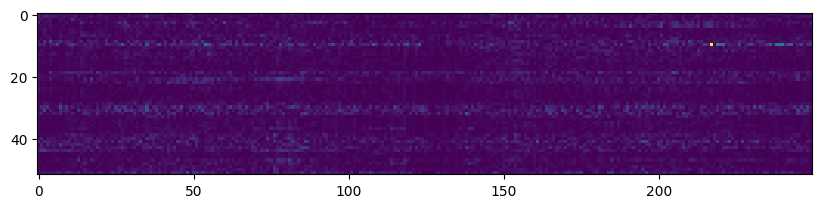

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

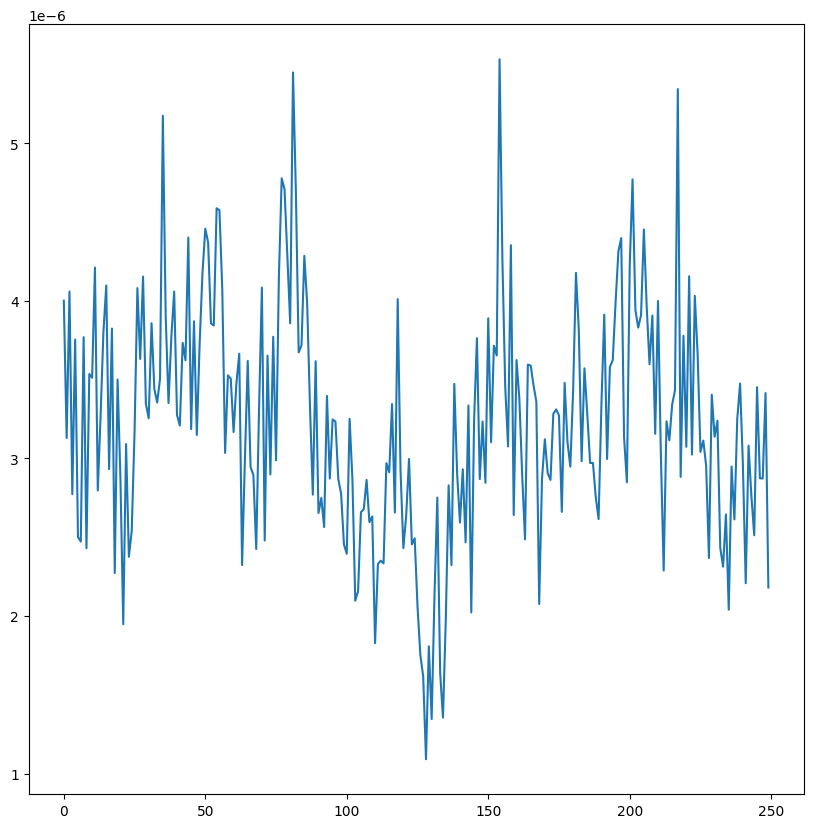

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

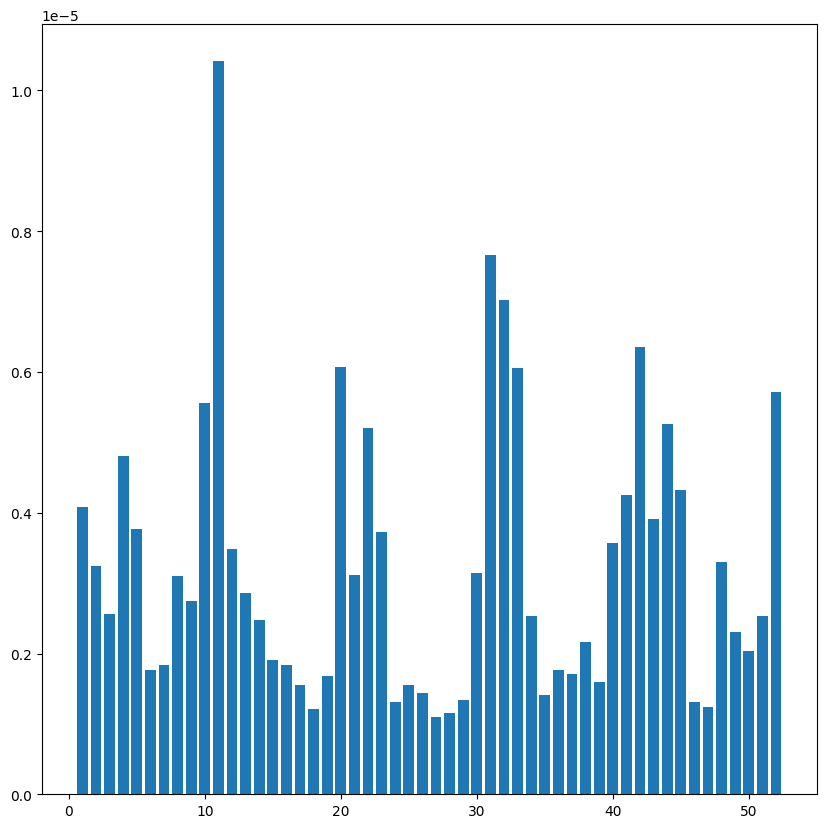

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
val = shap_values_v1.copy()

val = val.reshape(52, 250,10)
val = np.mean(val, axis=2)
val = np.abs(val)

# plot the SHAP values
plt.figure(figsize=(10, 10))
plt.imshow(val, cmap='viridis')


mean_0_val = np.mean(val, axis=0)
plt.figure(figsize=(10, 10))
plt.plot(mean_0_val)



mean_1_val = np.mean(val, axis=1)
plt.figure(figsize=(10, 10))
plt.bar(np.arange(1,53),mean_1_val)

In [17]:
np.array(tmp).shape


shap_52 = np.array(tmp).copy()

In [13]:
np.save('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/results/gnn_transformer/prognosis_mix_hb/pretreatment_response/loocv_v2l1_rate_0.01_l2_rate_0.01_d_model_16_batch_size_64_n_layers_6/LOO_nested_CV/shap_0-52.npy', np.array(tmp))